# Introduction

This project will show the analysis of species in the National Park Service and if there are patterns to them becoming endangered.

This project will focus on the analysis, clean up and plotting of data.


# Goals

The Goals for this project will be:
* What are the distribution of conservation status for animals?
* Are certain types of animals more inclined to be endangered?
    * What animals are they?
* Which species are most seen at different parks?


# Species
Lets see what is in the species data and do some analysis on it

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species_df = pd.read_csv('species_info.csv')

species_df.head()



,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [91]:
print(species_df.dtypes)
print(species_df.columns)


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


## How many animals there are?

In [3]:
print(species_df.scientific_name.nunique())

5541


## What are the categories these species are from?

In [4]:
print(species_df.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


## What are the types of conversation status?

In [5]:
print(species_df.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


## Show the counted values of each of the types of conservation status.

In [81]:
species_df.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


We currently see all the data that the conservation status has except the "nan" row. We will change it so that the "nan" row will be a different name and show up when we use groupby.
Then we will re-run the same code to see how many species are "Unthreated".

In [113]:
species_df.fillna('Unthreatened', inplace=True)
species_df.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10
4,Unthreatened,5363


We can see that a majority of the species are considered Unthreatened.

Now lets create a bar graph.

In [114]:
amount_protected = species_df.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

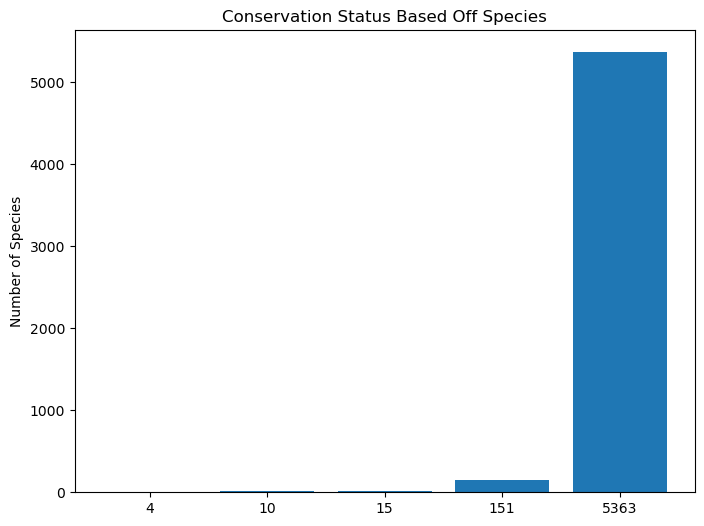

In [115]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
plt.bar(range(len(amount_protected)), amount_protected.scientific_name.values)
ax.set_xticks(range(len(amount_protected)))
ax.set_xticklabels(amount_protected.scientific_name)
plt.ylabel('Number of Species')
plt.title('Conservation Status Based Off Species')
plt.show()

Are certain types of animals more inclined to be endangered and What animals are they?

In [116]:
species_df['protected'] = species_df.conservation_status != 'Unthreatened'

In [117]:
category_counts = species_df.groupby(['category', 'protected']).scientific_name.nunique().reset_index()
category_counts.head()

,category,protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [118]:
category_pivots = category_counts.pivot(columns='protected',
                                          index='category',
                                          values='scientific_name').reset_index()
category_pivots.columns = ['category','unprotected','protected']
category_pivots

,category,unprotected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [119]:
category_pivots['percent_protected'] = category_pivots.protected / (category_pivots.protected + category_pivots.unprotected)*100
category_pivots

,category,unprotected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


We can see that Mammals and Birds are the two species that need the most protecting at around 17% and 15% respectfully.
By using chi2 contigency we can tell how much of difference the species have, using a p-value of 0.05.

In [120]:
from scipy.stats import chi2_contingency 

contingency = [[30,146],
               [75,413]]
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

By using chi2 contingency we can tell there isn't much of siginificant difference between Mammals and Birds

Let's try using Mammals and Reptiles

In [121]:
contingency2 = [[30,146],
                [5,73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

We can see that the p-value is 0.03 which is less than 0.05 threshold so there is a significiant difference between Mammals and Reptiles.

# Observations

Load in the observation data and do some small analysis on it.

In [122]:
observation_df = pd.read_csv('observations.csv')
observation_df.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [123]:
print(observation_df.dtypes)
print(observation_df.columns)

scientific_name    object
park_name          object
observations        int64
dtype: object
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


## Lets see the different types of parks

In [124]:
print(observation_df.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


## What species are seen the most at each park

Observations shows which animals were seen at different parks over the past 7 days. We will be looking at each individual names from species 'common names'.

In [125]:
from itertools import chain
import string

In [126]:
def remove_punc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species_df[species_df.category == "Mammal"].common_names.apply(remove_punc).str.split().tolist()

common_names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

We need to get rid of the duplicates that are in 'common names'

In [127]:
dupRows = []
for item in common_names:
    item = list(dict.fromkeys(item))
    dupRows.append(item)
    
dupRows[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

In [128]:
res = list(chain.from_iterable(i if isinstance(i,list)else [i] for i in dupRows))
res[:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

Next we will see how many times each animal will be counted from the data.

In [129]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
pd.DataFrame(set(words_counted),columns =['Word', 'Count']).sort_values('Count',ascending = False).head(10)

,Word,Count
160,Bat,23
82,Shrew,18
3,Myotis,17
101,Mouse,16
180,Chipmunk,13
167,American,12
73,Squirrel,12
1,Vole,11
114,Eastern,11
100,Western,10


It shows that Bat had the most amount of occurrences.

Since Bat came up the most we will be searching for all the species related to Bat. By making a new column is_bat we will see what is and isn't a bat.

In [130]:
species_df['is_bat'] = species_df.common_names.str.contains(r"\bBat\b", regex=True)
species_df.head(10)

,category,scientific_name,common_names,conservation_status,is_bat,protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Unthreatened,False,False
1,Mammal,Bos bison,"American Bison, Bison",Unthreatened,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Unthreatened,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Unthreatened,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Unthreatened,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Unthreatened,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Unthreatened,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,False,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,False,True
9,Mammal,Canis rufus,Red Wolf,Endangered,False,True


In [131]:
species_df[species_df.is_bat]

,category,scientific_name,common_names,conservation_status,is_bat,protected
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Unthreatened,True,False
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Unthreatened,True,False
32,Mammal,Lasiurus cinereus,Hoary Bat,Unthreatened,True,False
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Unthreatened,True,False


Now we are going to find how many times they have been seen over each national park.

In [133]:
bat_observation = observation_df.merge(species_df[species_df.is_bat])
bat_observation

,scientific_name,park_name,observations,category,common_names,conservation_status,is_bat,protected
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Unthreatened,True,False
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [140]:
bat_observation.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Let's see protected and non protected at each park. 

In [144]:
each_park = bat_observation.groupby(['park_name','protected']).observations.sum().reset_index()
each_park

,park_name,protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Each park seems to have around half of protected and non protected bats, so we will create a bar plot to show the difference between the two per park.

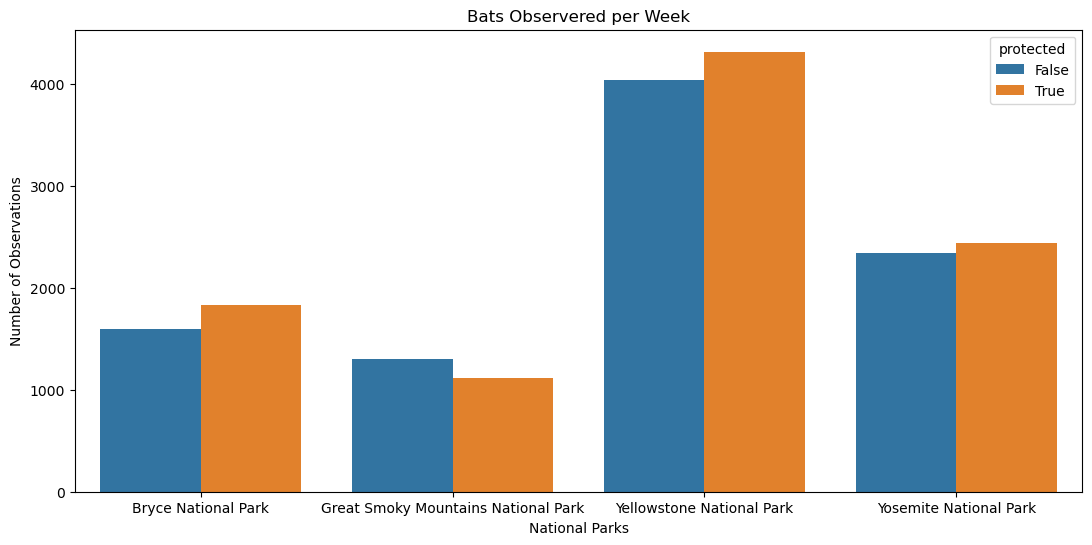

In [149]:
plt.figure(figsize=(13,6))
sns.barplot(x=each_park.park_name, y=each_park.observations, hue= each_park.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Bats Observered per Week')
plt.show()

# Conclusions

